In [26]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import warnings
warnings.simplefilter('ignore')

with open('./snowFallData/dataSet_N_0.csv', newline='') as f:
    data = list(csv.reader(f))
train_0_x = [x[:-1] for x in data[1:]  if x[-1]!=-1]
train_0_y = [x[-1] for x in data[1:] if x[-1]!=-1]

with open('./snowFallData/dataSet_N_1.csv', newline='') as f:
    data = list(csv.reader(f))
train_1_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_1_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/dataSet_N_2.csv', newline='') as f:
    data = list(csv.reader(f))
train_2_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_2_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/dataSet_N_3.csv', newline='') as f:
    data = list(csv.reader(f))
train_3_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_3_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/valSet_N_0.csv', newline='') as f:
    data = list(csv.reader(f))
test_0_x = [x[:-1] for x in data[1:]  if x[-1]!=-1]
test_0_y = [x[-1] for x in data[1:] if x[-1]!=-1]

with open('./snowFallData/valSet_N_1.csv', newline='') as f:
    data = list(csv.reader(f))
test_1_x = [x[:-1] for x in data[1:]]
test_1_y = [x[-1] for x in data[1:]]

with open('./snowFallData/valSet_N_2.csv', newline='') as f:
    data = list(csv.reader(f))
test_2_x = [x[:-1] for x in data[1:]]
test_2_y = [x[-1] for x in data[1:]]


with open('./snowFallData/valSet_N_3.csv', newline='') as f:
    data = list(csv.reader(f))
test_3_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
test_3_y = [x[-1] for x in data[1:]   if x[-1]!=-1]



In [27]:
def k_fold_cross(model, k, x_train, y_train):
    error=[]
    for i in range(k):
        low_index=int(i*len(x_train)/k)
        high_index=int((i+1)*len(x_train)/k)
        temp=model.fit(x_train[:low_index]+x_train[high_index:], y_train[:low_index]+y_train[high_index:])
        error.append( 1-temp.score(x_train[low_index:high_index], y_train[low_index:high_index])) 
    return sum(error)/len(error) 


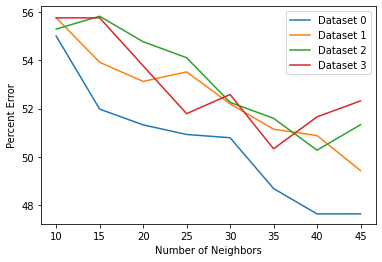

[55.76158940397351, 55.76158940397351, 53.77483443708609, 51.78807947019868, 52.582781456953654, 50.33112582781458, 51.65562913907284, 52.317880794701985]


In [36]:
score_0, score_1, score_2, score_3, x_axis=[], [], [], [], []

for x in range(10,50,5):  
    clf = KNeighborsClassifier(n_neighbors=x,weights='uniform')
    score_0.append(k_fold_cross(clf, 5, train_0_x, train_0_y)*100)
    score_1.append(k_fold_cross(clf, 5, train_1_x, train_1_y)*100)
    score_2.append(k_fold_cross(clf, 5, train_2_x, train_2_y)*100)
    score_3.append(k_fold_cross(clf, 5, train_3_x, train_3_y)*100)

    x_axis.append(x)
    
plt.plot(x_axis, score_0, label='Dataset 0')
plt.plot(x_axis, score_1, label='Dataset 1')
plt.plot(x_axis, score_2, label='Dataset 2')
plt.plot(x_axis, score_3, label='Dataset 3')



plt.xlabel('Number of Neighbors')
plt.ylabel('Percent Error')
plt.legend()
plt.show()    
print(score_3)

In [30]:
print(score_1)

[56.02736144998257, 56.299233182293484, 55.374695015684914, 55.77378877657719, 55.76681770651795, 55.63872429417916, 54.05629139072848, 54.44928546531893, 54.31334959916347, 53.91861275705821, 53.654583478563964, 53.3896828163123, 53.12478215406065, 53.91948414081561]
